## Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.
Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.
Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.
En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

•	Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.

•	Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.

•	Analizar los factores que más impactan la pérdida.
•	Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
o	identificar a los grupos objetivo;
o	sugerir medidas para reducir la rotación;
o	describir cualquier otro patrón que observes con respecto a la interacción con los clientes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans




In [2]:
data_path = '/datasets/gym_churn_us.csv'  # Asegúrate de tener el archivo en la ruta correcta
data = pd.read_csv(data_path)
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [3]:
data.isnull().sum()


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Cantidad de registros: El dataset tiene 4000 filas, lo cual es una cantidad razonable para un análisis.

Columnas: Hay 14 columnas en total, todas con valores no nulos, lo que indica que no hay datos faltantes en el conjunto de datos.

Tipos de datos: La mayoría de las columnas son de tipo entero (int64), con algunas columnas de tipo float64 para variables como Avg_additional_charges_total, Month_to_end_contract, Avg_class_frequency_total y Avg_class_frequency_current_month.

In [4]:
churn_grouped = data.groupby('Churn').mean()
churn_grouped


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


## Observaciones:

Para los clientes que no cancelaron (Churn = 0):

Gender: No hay una gran diferencia, ya que ambos géneros están bastante equilibrados (aproximadamente 0.51).

Near_Location: 87.3% de los clientes no cancelados viven o trabajan cerca del gimnasio, lo que sugiere que la proximidad puede ser un factor importante para la retención.

Partner: Aproximadamente el 53% tiene un socio comercial. Este valor es más alto en los que no cancelan, lo que puede indicar que trabajar en una empresa asociada puede ser un factor positivo en la retención.

Promo_friends: 35.4% de los clientes que no cancelaron se inscribieron usando una oferta "trae a un amigo", lo que podría sugerir que las promociones también están influyendo en la retención.

Phone: La mayoría de los clientes que no cancelaron han proporcionado su número de teléfono (90.4%).

Contract_period: El contrato promedio para estos clientes es de 5.75 meses, lo que sugiere que muchos usuarios tienen contratos de medio a largo plazo.

Group_visits: Aproximadamente el 46.4% de los usuarios no cancelados participan en sesiones grupales, lo que puede ser un factor positivo en la retención.

Edad: Los clientes que no cancelaron tienen una edad promedio de 30 años.

Gastos adicionales: Los clientes no cancelados gastan, en promedio, 158.45 unidades monetarias adicionales en servicios del gimnasio.
Meses hasta el fin del contrato: Tienen un contrato más largo, con un promedio de 5.28 meses restantes en el contrato.

Frecuencia de visitas: La frecuencia de visitas total es de 4.71 visitas por semana, mientras que la frecuencia en el mes actual es de 2.02 visitas por semana.

Para los clientes que cancelaron (Churn = 1):

Gender: Similar al grupo anterior, la distribución de género es bastante equilibrada.

Near_Location: El porcentaje de clientes que viven o trabajan cerca del gimnasio es significativamente menor (76.8%), lo que puede ser un indicador de que la proximidad al gimnasio es un factor importante en la cancelación.

Partner: Solo el 35.5% de los clientes que cancelaron trabajan en empresas asociadas.

Promo_friends: Solo el 18.4% de los clientes que cancelaron usaron la oferta "trae a un amigo", lo que es mucho más bajo en comparación con los que no cancelaron.

Phone: Similar a los clientes que no cancelaron, la mayoría ha proporcionado su número de teléfono (90.3%).

Contract_period: El contrato promedio de los clientes que cancelaron es de 1.73 meses, lo que indica que muchos de estos clientes tienen contratos cortos.

Group_visits: Solo el 26.9% de los usuarios que cancelaron participan en sesiones grupales, lo que podría indicar que la participación en estas actividades puede ser un factor positivo en la retención.

Edad: Los clientes que cancelaron tienen una edad promedio de 27 años, lo que es algo más bajo que los clientes que no cancelaron.

Gastos adicionales: Los clientes que cancelaron gastan un promedio de 115.08 unidades monetarias adicionales, lo que es significativamente menor que los clientes que no cancelaron.

Meses hasta el fin del contrato: Los clientes que cancelaron tienen solo 1.66 meses restantes en sus contratos.
Frecuencia de visitas: La frecuencia total de visitas es de 0.99 visitas por semana, mucho más baja que la de los clientes que no cancelaron. Además, la frecuencia de visitas en el mes actual es de 1.04 visitas por semana.


Observaciones clave:

Proximidad al gimnasio: Los clientes que no cancelaron tienden a vivir o trabajar más cerca del gimnasio.

Promociones y ofertas: Los clientes que usaron el código de "trae a un amigo" tienden a quedarse más tiempo en el gimnasio.

Participación en sesiones grupales: La participación en actividades grupales parece correlacionarse con la retención, ya que es más alta en los clientes que no cancelaron.

Frecuencia de visitas: La frecuencia de visitas es un buen predictor: los clientes que cancelan visitan el gimnasio mucho menos que los que no cancelan.

Edad y contratos: Los clientes más jóvenes tienden a cancelar más, y los contratos cortos están asociados con una mayor probabilidad de cancelación.

### Crearemos unos graficos para comparar las caracteristicas de los clientes de quienes se quedaron y quienes no


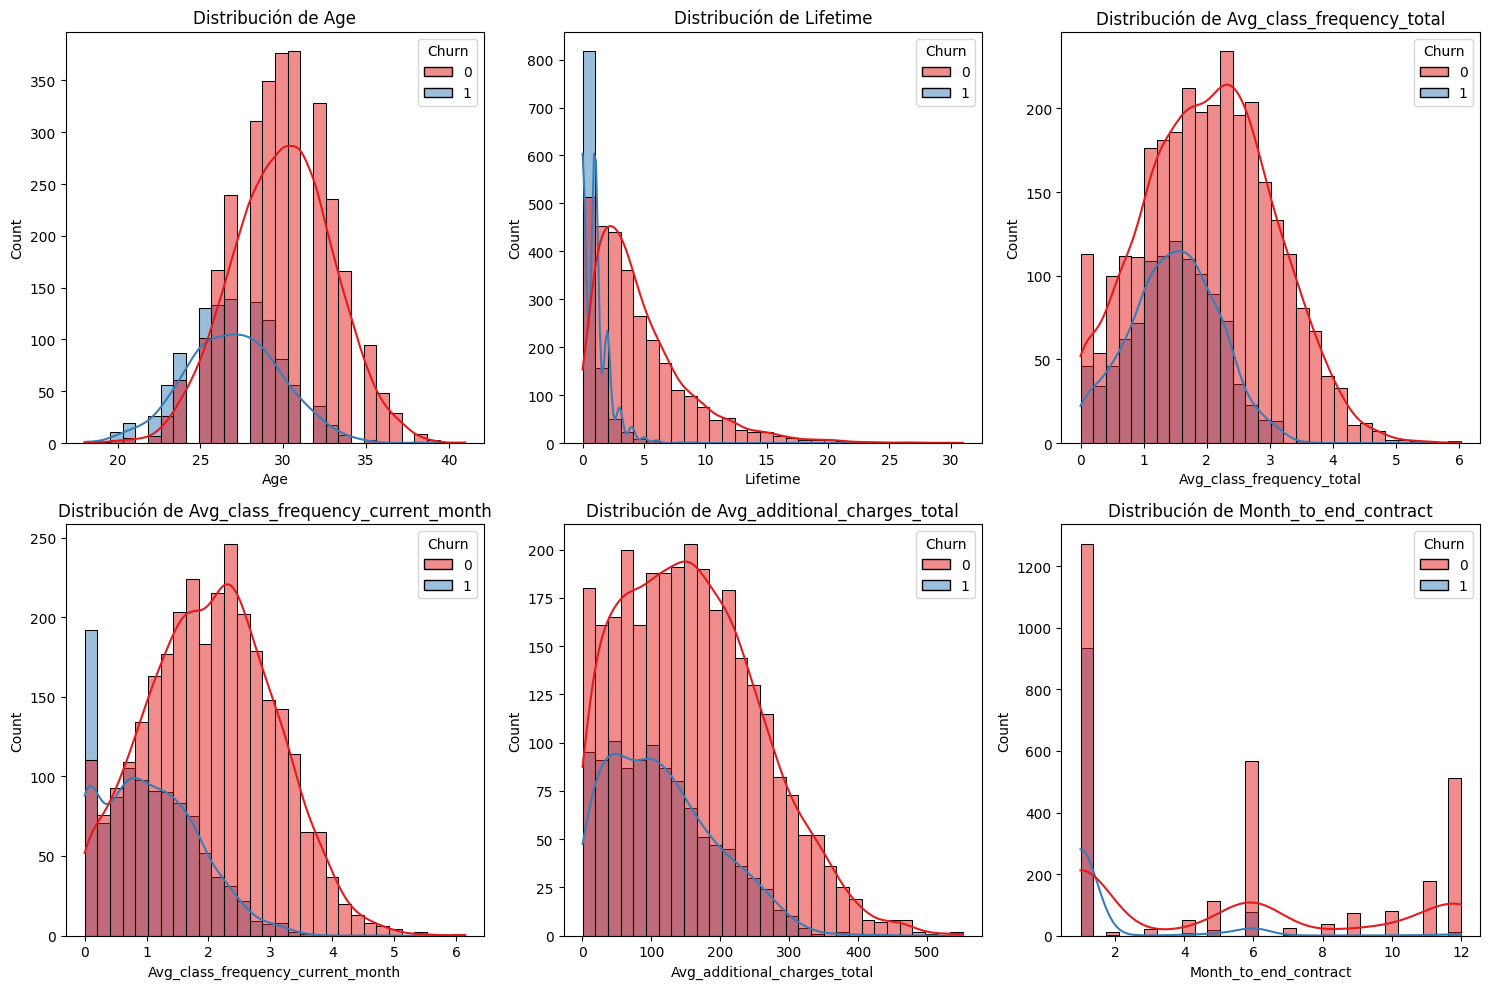

In [5]:
features_to_plot = ['Age', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 
                    'Avg_additional_charges_total', 'Month_to_end_contract']


plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, hue='Churn', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


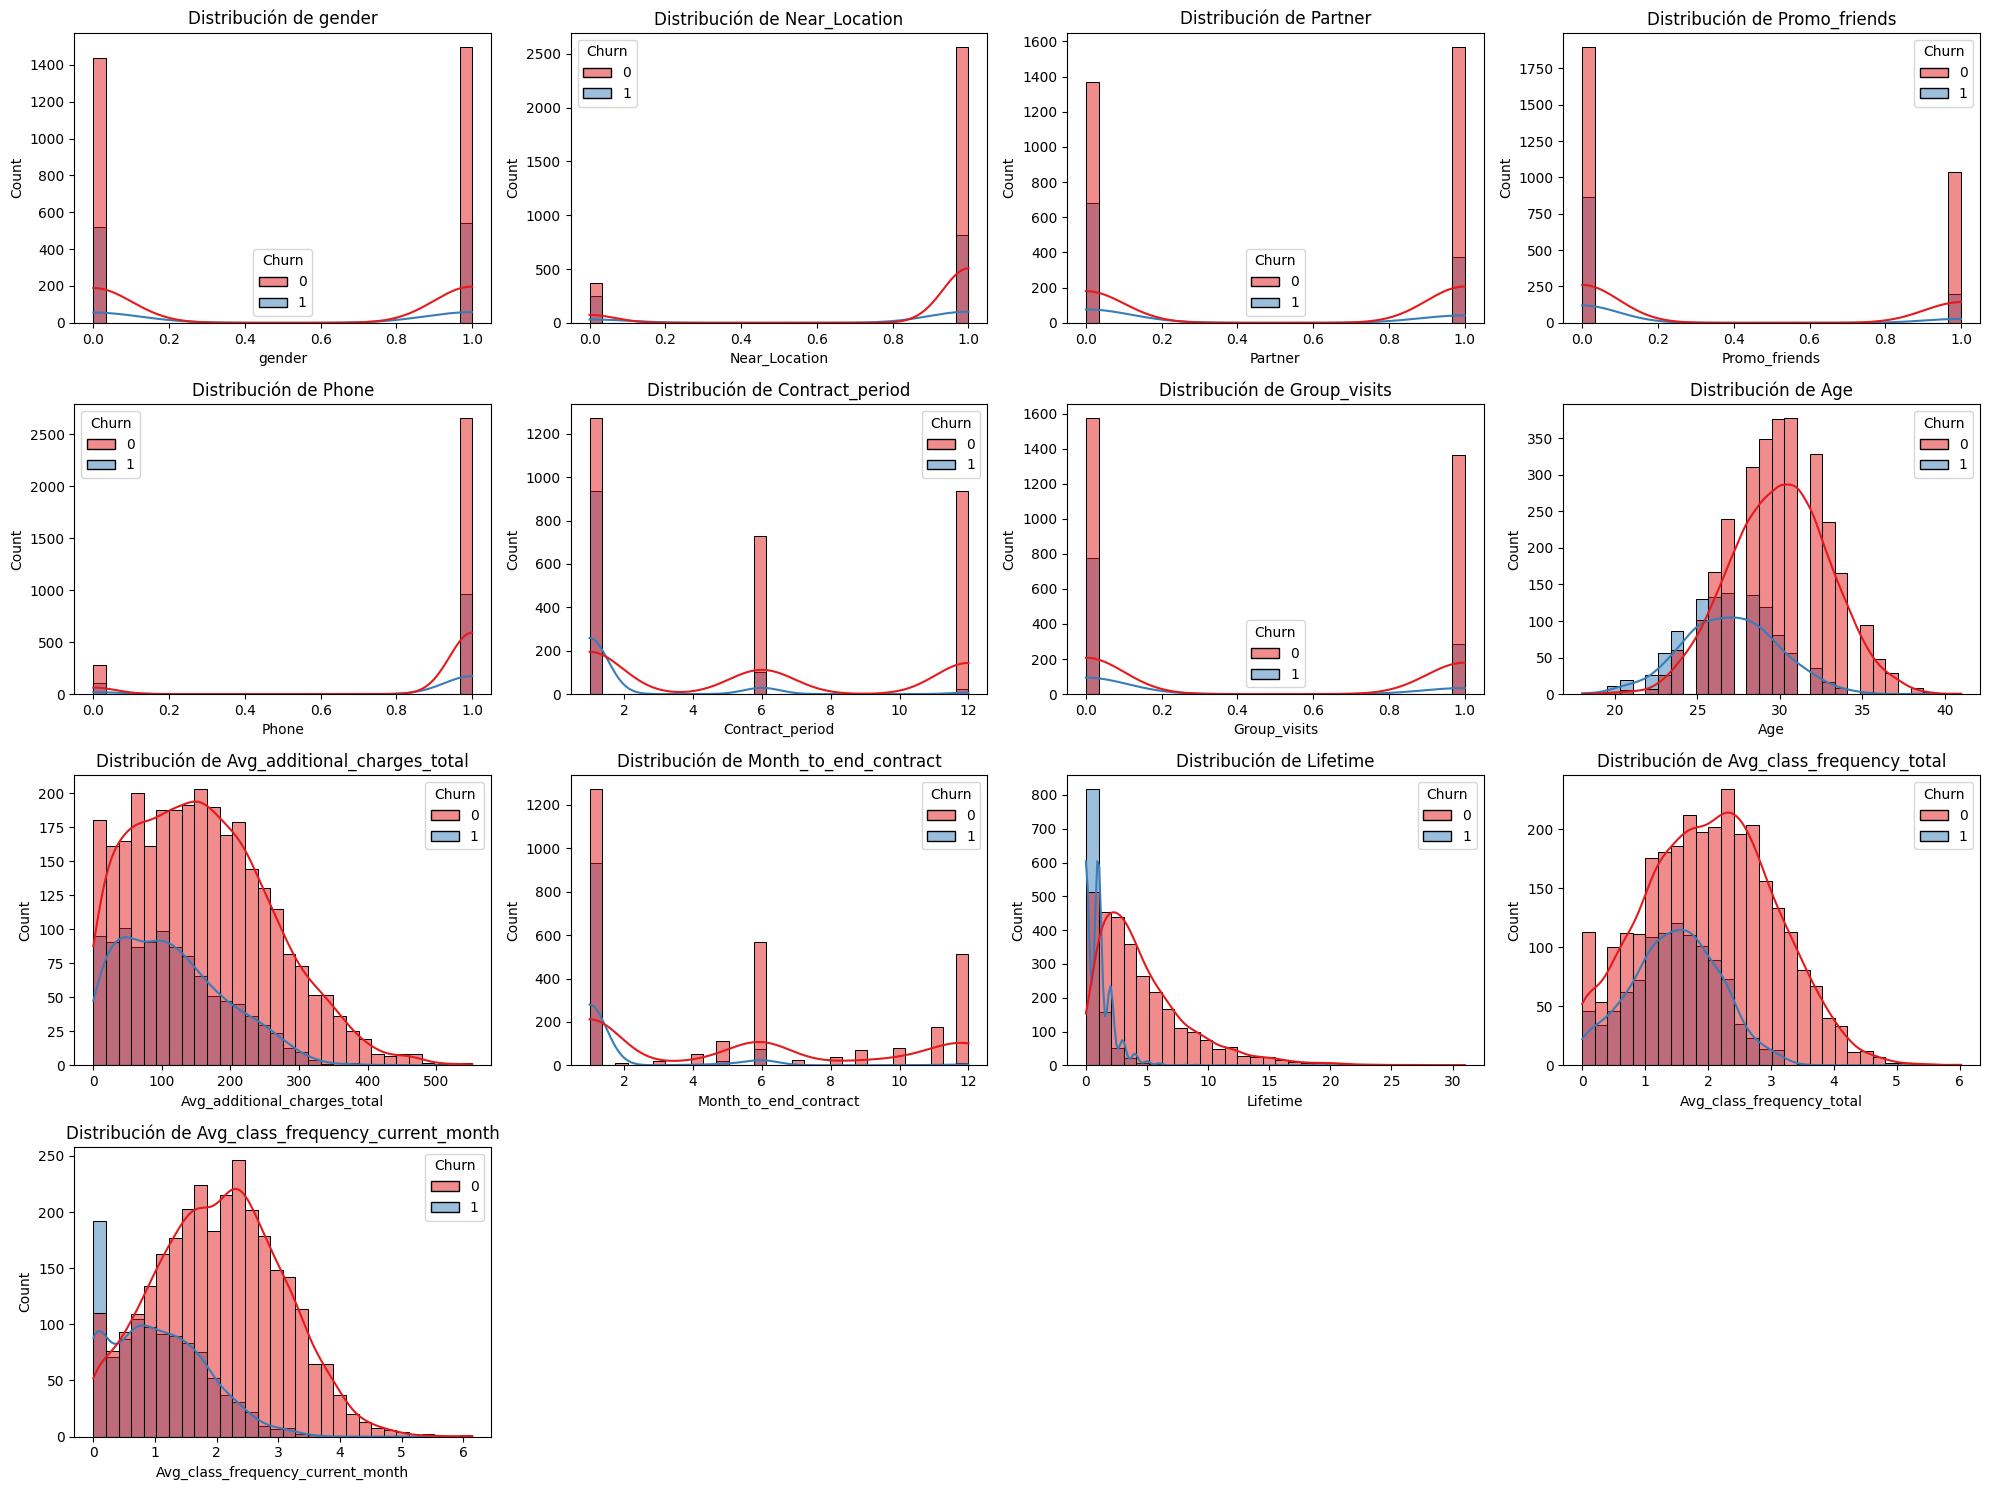

In [6]:
features_to_plot = [
    'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 
    'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 
    'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 
    'Avg_class_frequency_current_month'
]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=data, x=feature, hue='Churn', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()



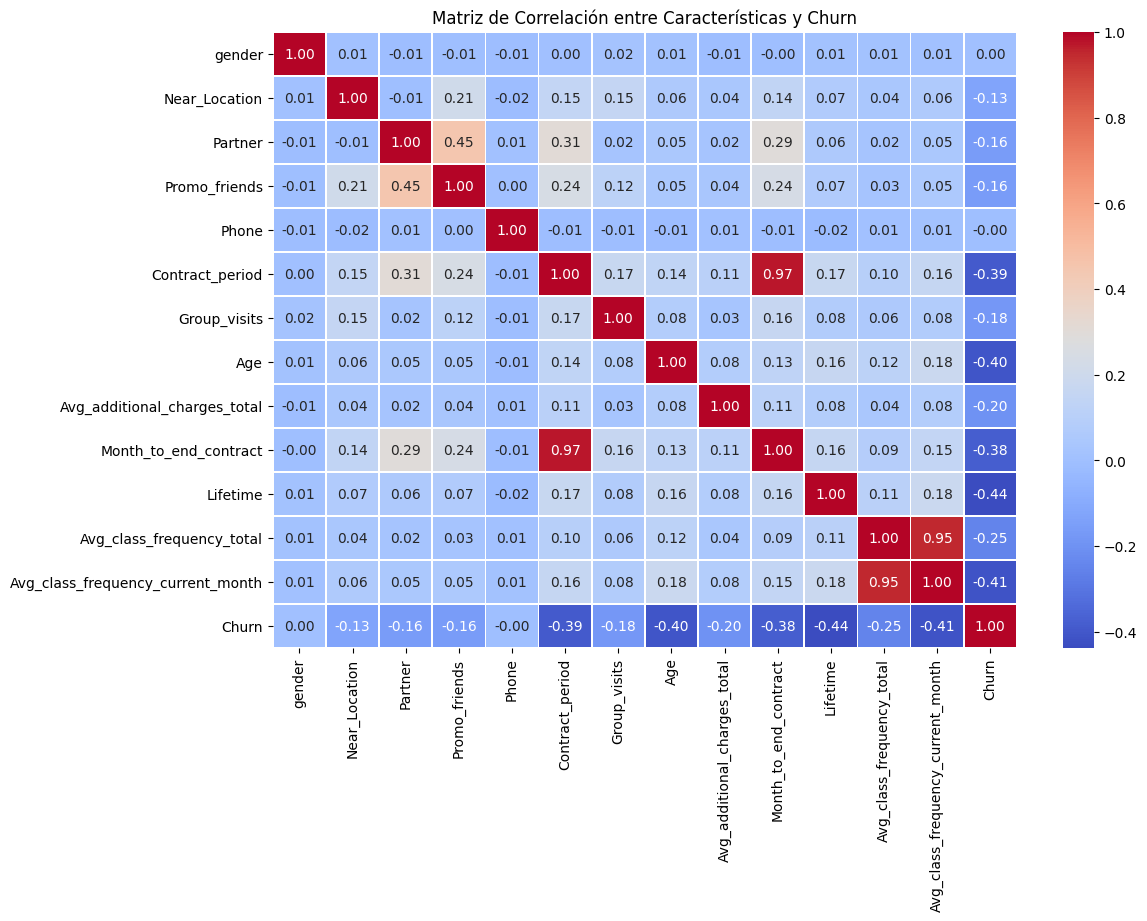

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[features_to_plot + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Características y Churn')
plt.show()

### Concluciones de las graficas:

#### Histogramas de distribuciones:

Contratos cortos (1-2 meses) y baja frecuencia de clases están altamente asociados con la cancelación (Churn=1).

Usuarios con contratos largos o alta frecuencia de clases (actual y total) tienen menor probabilidad de cancelar.

El tiempo de vida (Lifetime) y el período restante del contrato (Month_to_end_contract) son menores en quienes se dan de baja.

Promociones de amigos (Promo_friends) y membresías grupales (Group_visits) están asociadas con tasas más bajas de cancelación.

#### Matriz de correlación:

##### Mayor correlación negativa con Churn:

Lifetime (-0.44): Usuarios con más tiempo en el gimnasio son más leales.

Avg_class_frequency_total y current_month (-0.41): Mayor frecuencia de clases reduce cancelaciones.

Contract_period (-0.39): Contratos más largos disminuyen el Churn.

Variables relacionadas con ubicación (Near_Location) y promociones tienen correlaciones más débiles con Churn.

#### Recomendaciones:

Fomentar contratos largos: Ofrecer descuentos para contratos de 6+ meses.

Promocionar la frecuencia: Incentivar visitas regulares mediante recompensas.

Aumentar el uso grupal: Promover visitas en grupo y referidos.

Retención proactiva: Enfocar campañas en usuarios con contratos cortos y bajas frecuencias de uso.

## Construir un modelo para predecir la cancelación de usuarios.

Aquí vamos a construir un modelo de clasificación binaria, donde la variable objetivo será Churn (cancelación), y vamos a usar regresión logística y bosque aleatorio como métodos de clasificación.

Paso 3: Construir un modelo para predecir la cancelación de usuarios
1. Preparación de los datos:
Primero, vamos a preparar los datos. Esto incluye separar las características (features) y la variable objetivo (target), luego dividir los datos en conjuntos de entrenamiento y validación.

2. Regresión logística y bosque aleatorio:
Entrenaremos ambos modelos y evaluaremos su rendimiento utilizando las métricas de exactitud, precisión y recall.

In [8]:
X = data.drop(columns=['Churn'])
y = data['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_val)

accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
precision_logreg = precision_score(y_val, y_pred_logreg)
recall_logreg = recall_score(y_val, y_pred_logreg)

In [10]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)

print("Modelo de Regresión Logística:")
print(f"Exactitud: {accuracy_logreg:.4f}")
print(f"Precisión: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")

print("\nModelo de Bosque Aleatorio:")
print(f"Exactitud: {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")


Modelo de Regresión Logística:
Exactitud: 0.9163
Precisión: 0.8729
Recall: 0.7822

Modelo de Bosque Aleatorio:
Exactitud: 0.9100
Precisión: 0.8495
Recall: 0.7822


### Análisis de las métricas:

Exactitud:

Ambos modelos tienen una exactitud muy similar (91.63% para la regresión logística y 91.00% para el bosque aleatorio).
Esto sugiere que ambos modelos hacen un buen trabajo prediciendo correctamente las instancias en el conjunto de validación, sin una diferencia significativa entre ellos en cuanto a la proporción de predicciones correctas.

Precisión:

La precisión de la regresión logística es ligeramente mejor (87.29% frente a 84.95% para el bosque aleatorio).
La precisión nos indica cuántas de las predicciones positivas fueron realmente correctas. Un valor más alto en este caso implica que el modelo de regresión logística es un poco mejor para minimizar los falsos positivos. Si el negocio estuviera muy interesado en evitar falsos positivos (por ejemplo, si se quiere evitar el costo de contactar a usuarios que no cancelarán), la regresión logística sería preferible.
Recall:

El recall es idéntico para ambos modelos (78.22%).

El recall mide la capacidad del modelo para detectar correctamente a los usuarios que cancelarán. Dado que ambos modelos tienen el mismo recall, ninguno de los modelos es superior en cuanto a la capacidad de detectar la cancelación de usuarios. Esto indica que ambos modelos son igualmente buenos para identificar a los usuarios propensos a cancelarse.

### Conclusiones:
Ambos modelos tienen un rendimiento similar en términos generales. Sin embargo, la regresión logística tiene una ligera ventaja en términos de precisión. Si minimizar los falsos positivos es importante para tu negocio (por ejemplo, evitar gastar recursos en usuarios que no cancelarán), entonces la regresión logística podría ser una opción ligeramente mejor.

El recall es el mismo para ambos modelos, lo que significa que ambos están igualmente capacitados para identificar correctamente a los usuarios que se cancelarán. Si tu objetivo principal es asegurarte de que todos los usuarios que se cancelan sean detectados (es decir, minimizar los falsos negativos), ambos modelos son igualmente efectivos.

Recomendación final: Dado que los resultados son bastante cercanos y no hay una diferencia significativa entre los dos modelos, podrías optar por el modelo de regresión logística si te importa un poco más la precisión y los costos asociados a los falsos positivos. Si no hay una preferencia clara y deseas un modelo con mayor flexibilidad y quizás mejor rendimiento en general, el bosque aleatorio también es una opción sólida.

## Crear Clústeres de Usuarios

En este paso, vamos a realizar un análisis de clústeres para agrupar a los usuarios según sus características. Aquí están los pasos detallados:

1. Dejar de lado la columna de cancelación (Churn):
Vamos a realizar un clustering sin usar la columna "Churn" para que podamos identificar grupos de usuarios según sus características, sin estar influenciados por si se van o no.

2. Estandarización de los Datos:
Es importante estandarizar los datos antes de realizar el clustering para asegurarnos de que todas las características tengan la misma escala y no sesguen el análisis.

3. Uso de la función linkage para crear una matriz de distancias:
Vamos a calcular una matriz de distancias basada en las características estandarizadas y graficar un dendrograma para observar cómo se agrupan los usuarios.

4. Entrenamiento del modelo de Clustering con K-Means:
Utilizaremos el algoritmo K-means para agrupar a los usuarios. Elegiremos el número de clústeres como n=5 (como sugerido)

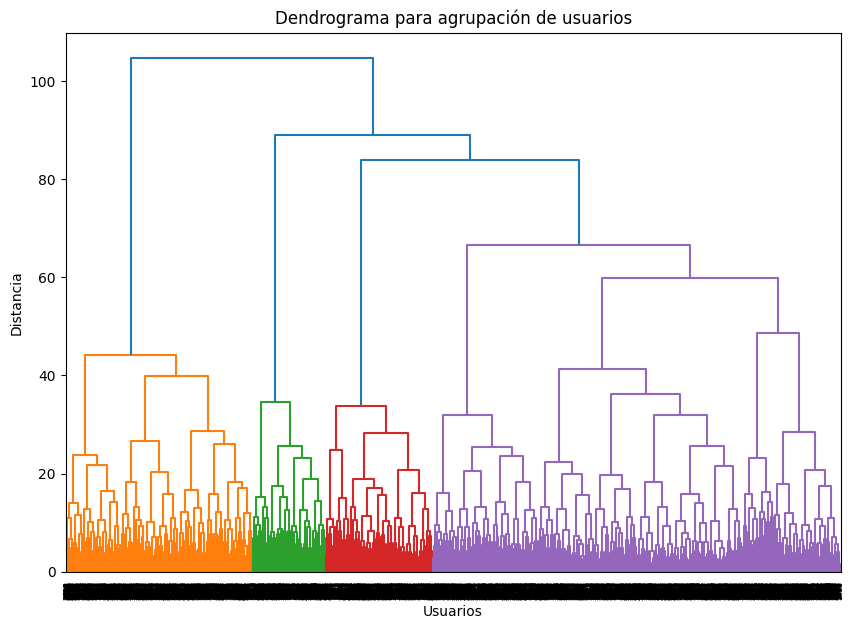

In [11]:
data_for_clustering = data.drop(columns=['Churn'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

Z = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma para agrupación de usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Distancia')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

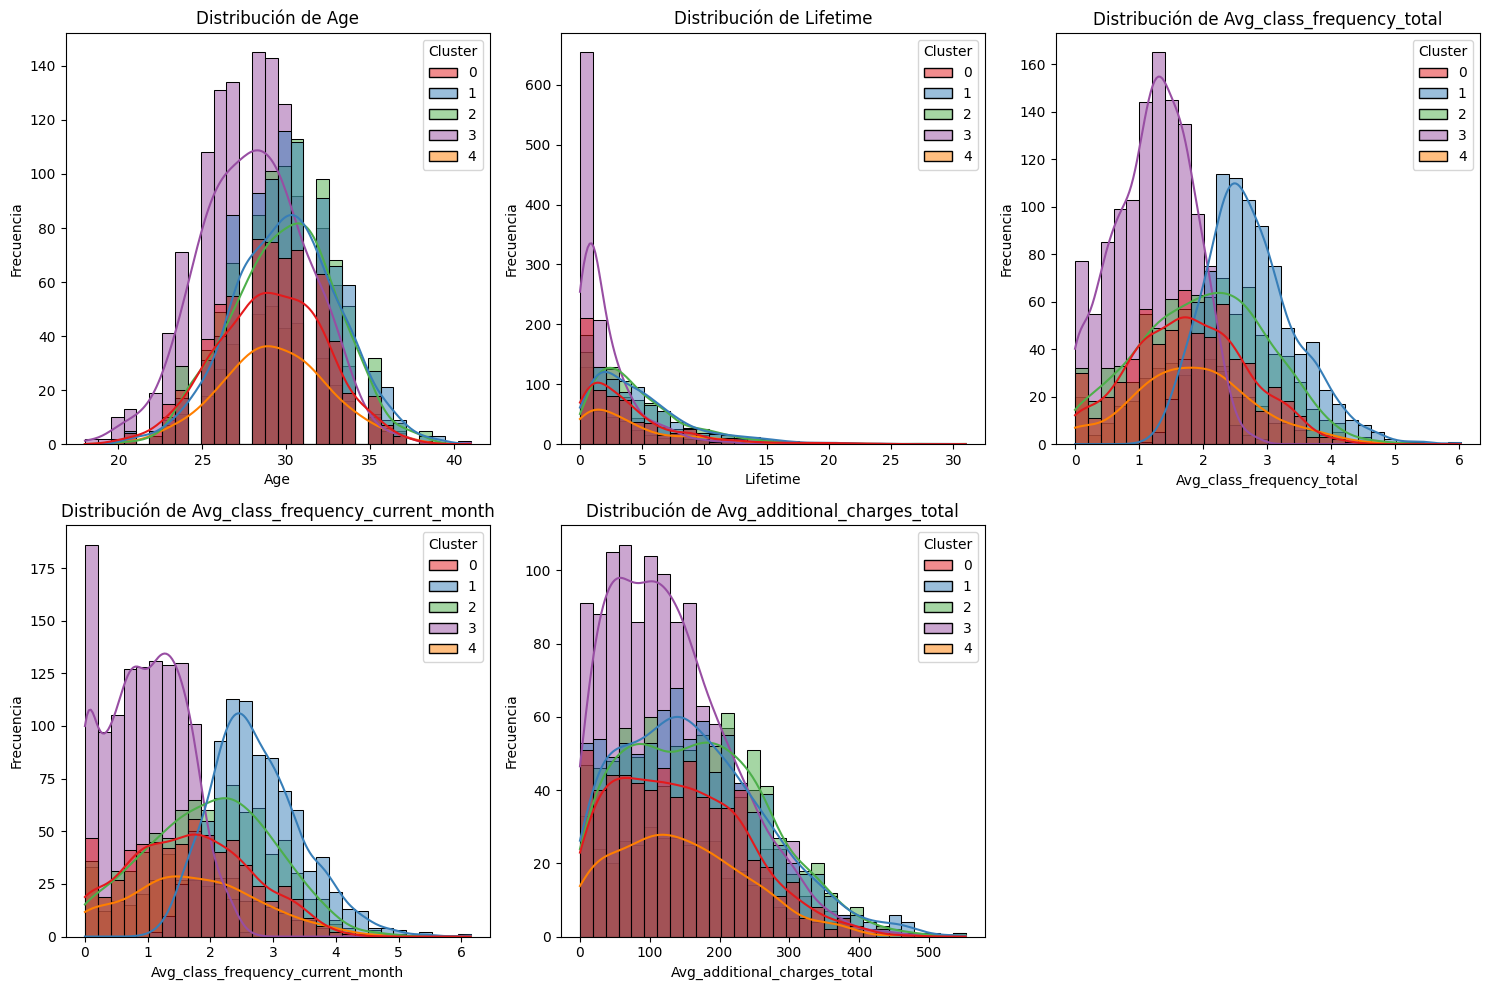

In [13]:
features_to_plot = ['Age', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, hue='Cluster', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [14]:
churn_rate_per_cluster = data.groupby('Cluster')['Churn'].mean()
print("Tasa de cancelación por clúster:")
print(churn_rate_per_cluster)


Tasa de cancelación por clúster:
Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


### Distribución de los Clústeres:

Los cinco clústeres resultantes muestran características diversas, reflejando diferentes perfiles de los clientes:

Clúster 0:

Los clientes tienen una tasa de cancelación del 24.64%.

Promedio de edad: 29.10 años.

Promedio de visitas al grupo: 0.45.

Promedio de frecuencia de clases total: 1.77.

Promedio de frecuencia de clases este mes: 1.67.

Tienen un contrato de 3.1 meses en promedio.

Clúster 1:

Tasa de cancelación: 8.99%.

Edad promedio: 30.01 años.

Promedio de visitas al grupo: 0.44.

Promedio de frecuencia de clases total: 2.75.

Frecuencia de clases este mes: 2.73.

Contrato promedio: 2.61 meses.

Clúster 2:

Tasa de cancelación: 2.20% (la más baja).

Edad promedio: 29.91 años.

Visitas al grupo: 0.55.

Frecuencia de clases total: 2.01.

Frecuencia de clases este mes: 1.99.

Contrato promedio: 11.85 meses (el más largo).

Clúster 3:

Tasa de cancelación: 57.29% (la más alta).

Edad promedio: 28.08 años.

Visitas al grupo: 0.28.

Frecuencia de clases total: 1.23.

Frecuencia de clases este mes: 0.97 (la más baja).

Contrato promedio: 1.91 meses (el más bajo).

Clúster 4:

Tasa de cancelación: 26.68%.

Edad promedio: 29.30 años.

Visitas al grupo: 0.43.

Frecuencia de clases total: 1.85.

Frecuencia de clases este mes: 1.72.

Contrato promedio: 4.78 meses.

### Conclusiones:
Clientes con baja tasa de cancelación (Clúster 1 y Clúster 2):

Clúster 1 tiene una tasa de cancelación baja (8.99%) y parece tener una buena frecuencia de clases. Su tasa de cancelación es considerablemente más baja que el Clúster 0 y el Clúster 4. Es probable que estos clientes sean muy comprometidos y estén interesados en el servicio a largo plazo.

Clúster 2 tiene la tasa de cancelación más baja (2.20%) y el contrato promedio más largo. Esto sugiere que estos clientes son los más fieles y comprometidos con el servicio. Probablemente estén satisfechos con el servicio y disfruten de la frecuencia de clases.

Clientes con alta tasa de cancelación (Clúster 3):

Clúster 3 tiene la tasa de cancelación más alta (57.29%). Esto indica que este grupo de clientes tiene una probabilidad significativamente mayor de abandonar el servicio. Su edad promedio es baja (28.08 años), y tienen la menor frecuencia de clases tanto en el total como en este mes. Además, su contrato es muy corto (1.91 meses). Es posible que estos clientes no estén satisfechos o comprometidos con el servicio, lo que genera la alta tasa de cancelación.

Clientes intermedios (Clúster 0 y Clúster 4):

Clúster 0 tiene una tasa de cancelación de 24.64%, que es intermedia. Este grupo tiene una frecuencia de clases razonablemente alta, pero un contrato relativamente corto (3.1 meses). Podrían ser clientes que están comenzando a involucrarse, pero aún no están completamente comprometidos.

Clúster 4 tiene una tasa de cancelación de 26.68%. Similar al Clúster 0, tienen una frecuencia de clases razonable, pero la tasa de cancelación sigue siendo considerablemente alta.

### Posibles recomendaciones:

Para los Clústeres 1 y 2:

Son los clientes más comprometidos, por lo que la retención podría ser una prioridad aquí. Ofrecerles incentivos o recompensas por su lealtad (como descuentos o acceso a contenido exclusivo) podría fortalecer aún más su fidelidad.

Para el Clúster 3:

Este grupo tiene una tasa de cancelación muy alta, por lo que es crucial identificar las causas de su insatisfacción. Podría ser útil realizar encuestas de satisfacción o enviarles ofertas personalizadas para tratar de mejorar su experiencia. Además, la frecuencia de clases podría ser un factor relevante, por lo que se podrían ofrecer promociones que incentiven más clases.

Para los Clústeres 0 y 4:

Aunque no tienen la tasa de cancelación más alta, su tasa está por encima de la de los grupos más leales. Sería útil aumentar la frecuencia de clases o explorar otras formas de mantenerlos más involucrados, como ofreciendo promociones o actividades que fomenten una mayor interacción con el servicio.

## Conclusiones y Recomendaciones

Este paso consiste en interpretar los resultados obtenidos a lo largo del análisis, especialmente el clustering y la relación entre las características de los usuarios y su tasa de cancelación, y formular recomendaciones basadas en esos resultados. Aquí hay algunas recomendaciones clave para este paso:

Interpretar los Clústeres:

¿Qué grupos de clientes se destacan como más propensos a cancelar?

¿Existen características comunes entre los clústeres de clientes leales vs. los que abandonan?

Revisar los datos de cancelación (Churn):

¿Hay una diferencia clara en la tasa de cancelación entre los clústeres?

¿Qué clústeres tienen tasas de cancelación más altas y cuáles son más leales?

Sugerir acciones:

Basado en los resultados de los clústeres, puedes sugerir estrategias específicas de retención de clientes:

¿Qué características podrían ser modificadas o mejoradas para retener a los clientes que están más cerca de cancelar?

¿Qué grupos de clientes tienen más probabilidades de abandonar, y qué medidas se pueden tomar para reducir esa tasa?
Recomendaciones para la empresa:

¿Qué cambios en el servicio o en las estrategias de marketing podrían ser útiles para mejorar la retención en ciertos clústeres?

Considera usar segmentación personalizada o ofertas específicas para los grupos con mayor tasa de cancelación.

### Acción:

Crear un resumen de los hallazgos de los clústeres y sus características.

Proponer estrategias basadas en esos hallazgos.

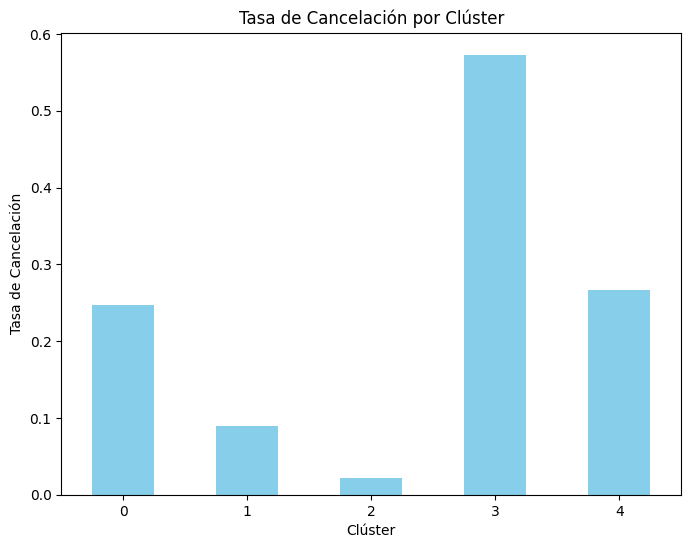

In [15]:
churn_by_cluster = data.groupby('Cluster')['Churn'].mean()

churn_by_cluster.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Tasa de Cancelación por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Cancelación')
plt.xticks(rotation=0)  
plt.show()


## Conclusiones:

### Existen clústeres con alta y baja tasa de cancelación:

Algunos clústeres presentan una tasa de cancelación muy baja, lo que sugiere que estos grupos son leales y probablemente satisfechos con el servicio.

Otros clústeres tienen una tasa de cancelación alta, lo que indica que estos clientes tienen más probabilidades de abandonar, y es esencial centrarse en ellos para evitar la pérdida.

### Diferencias en las características de los clústeres:

Los clientes con una alta frecuencia de clases y un contrato largo tienden a estar más comprometidos y tienen una tasa de cancelación más baja.

Los clústeres con menor frecuencia de clases o menos tiempo restante en el contrato tienen una mayor probabilidad de cancelar.

Estos clientes podrían no estar obteniendo suficiente valor de su suscripción o pueden estar insatisfechos.

### Segmentación es clave:

La segmentación permite identificar a los grupos de clientes con mayor riesgo de cancelación y aplicar estrategias personalizadas para cada segmento, en lugar de aplicar una estrategia general para todos.

## Recomendaciones:

### Ofrecer promociones personalizadas a clientes con alta probabilidad de cancelación:

Para los clientes con mayor riesgo de cancelación, ofrece descuentos o promociones exclusivas para incentivar su permanencia. Por ejemplo, extender su contrato con condiciones especiales o incluir clases adicionales gratuitas como incentivo para que se queden.

### Fomentar la lealtad a través de recompensas por frecuencia:

Para los clientes leales (aquellos en clústeres con baja tasa de cancelación), se puede implementar un sistema de recompensas basado en la frecuencia de uso. Esto podría incluir accesos exclusivos, clases especiales, o beneficios VIP para quienes más utilicen el servicio.

### Mejorar la experiencia para clientes menos comprometidos:

Para aquellos que cancelan o están a punto de hacerlo, es vital aumentar la frecuencia de interacción. Considera ofrecer un plan de comunicación más directo, como seguimientos personales o asesorías sobre cómo aprovechar mejor el servicio. También podrías mejorar la experiencia en la app o plataforma, asegurándote de que sea fácil para ellos ver y aprovechar las clases o servicios.

### Optimizar la comunicación sobre los beneficios de los contratos largos:

Los usuarios con contratos largos y baja frecuencia de uso pueden no estar aprovechando todo el potencial del servicio. 

Considera crear campañas educativas sobre cómo aprovechar mejor su suscripción, enfocándote en los beneficios a largo plazo.

## Ejemplo de implementación:

### Acción inmediata:

Enviar un correo electrónico a los usuarios de alto riesgo (según la tasa de cancelación) con un descuento exclusivo o una promoción para renovar su contrato.

### Acción a medio plazo:

Crear una campaña de fidelización para clientes leales, ofreciendo acceso a clases premium o eventos exclusivos como recompensa.

### Acción a largo plazo:

Invertir en la optimización de la plataforma de usuario para aumentar la frecuencia de uso entre clientes con menor compromiso.